In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import charset_normalizer as chn
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv


In [2]:
netflix = pd.read_csv('/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv')

In [3]:
netflix.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [5]:
netflix.describe(include='all')

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
count,5283.000000,5283,5283,5283,5278,5283.000000,2998,5283.000000,5283,5283.000000,5.267000e+03
unique,NaN,5283,5237,2,5276,NaN,11,NaN,5283,NaN,NaN
top,NaN,tm84618,The Gift,MOVIE,"Away from school, during the winter holidays, ...",NaN,TV-MA,NaN,tt0075314,NaN,NaN
freq,NaN,1,3,3407,2,NaN,792,NaN,1,NaN,NaN
mean,2641.000000,NaN,NaN,NaN,NaN,2015.879992,NaN,79.199886,NaN,6.533447,2.340719e+04
std,1525.215067,NaN,NaN,NaN,NaN,7.346098,NaN,38.915974,NaN,1.160932,8.713432e+04
min,0.000000,NaN,NaN,NaN,NaN,1953.000000,NaN,0.000000,NaN,1.500000,5.000000e+00
25%,1320.500000,NaN,NaN,NaN,NaN,2015.000000,NaN,45.000000,NaN,5.800000,5.210000e+02
50%,2641.000000,NaN,NaN,NaN,NaN,2018.000000,NaN,87.000000,NaN,6.600000,2.279000e+03
75%,3961.500000,NaN,NaN,NaN,NaN,2020.000000,NaN,106.000000,NaN,7.400000,1.014400e+04


In [6]:
netflix.drop(columns=['id'],inplace=True)
netflix.columns

Index(['index', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [7]:
netflix['release_year'] = netflix.release_year.astype(int)

In [13]:
year_count = netflix.groupby('release_year')['index'].agg('count').reset_index(name='count')
year_count

,release_year,count
0,1953,1
1,1954,2
2,1956,1
3,1958,1
4,1959,1
...,...,...
61,2018,733
62,2019,749
63,2020,657
64,2021,687


<Axes: ylabel='release_year'>

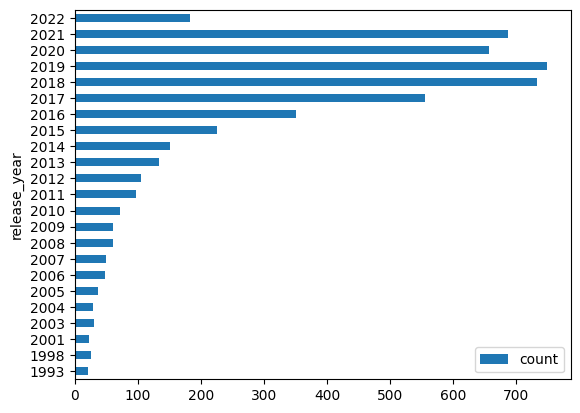

In [17]:
year_count[year_count['count']>20].plot.barh('release_year','count')

There seemed to be an increase in the number of movies represented per year in the dataset with a sudden decline in 2022; not much relevance.

Text(0.5, 1.0, 'Imdb Scores')

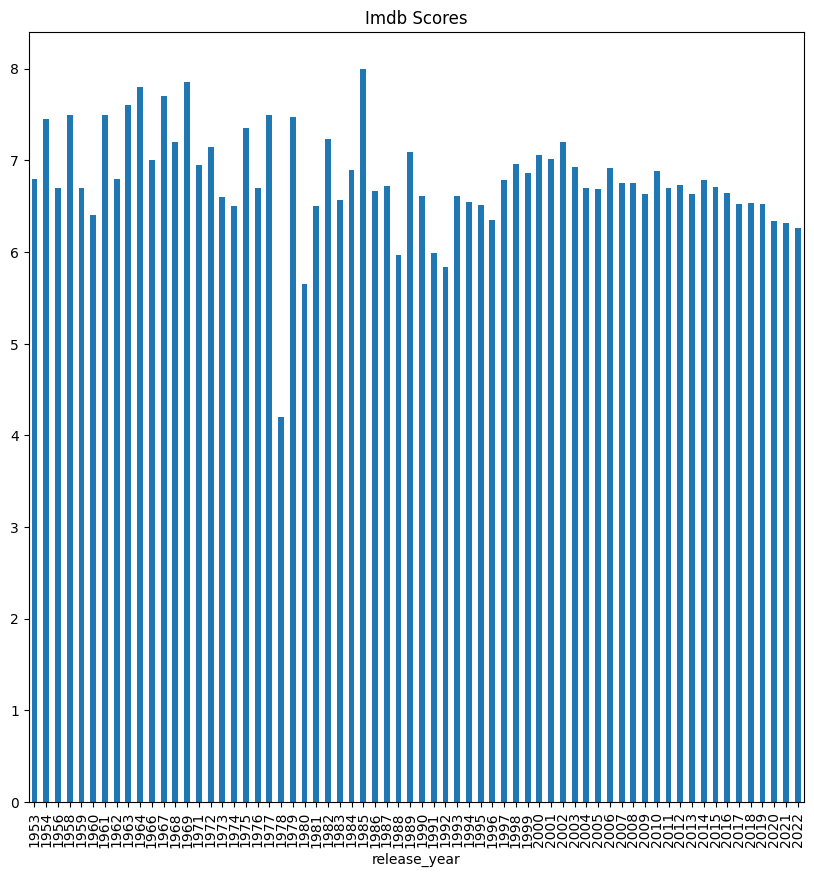

In [23]:
plt.figure(figsize=(10,10))
netflix.groupby('release_year')['imdb_score'].agg('mean').plot.bar()
plt.title('Imdb Scores')

In [24]:
netflix.columns

Index(['index', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [25]:
netflix.age_certification.value_counts(dropna=False)

age_certification
NaN      2285
TV-MA     792
R         548
TV-14     436
PG-13     424
PG        238
TV-PG     172
G         105
TV-Y7     104
TV-Y       94
TV-G       72
NC-17      13
Name: count, dtype: int64

removing rows with null entries in age_certification; storing in a new variable

In [26]:
netflix_clean = netflix.dropna(subset=['age_certification'])

<Axes: ylabel='age_certification'>

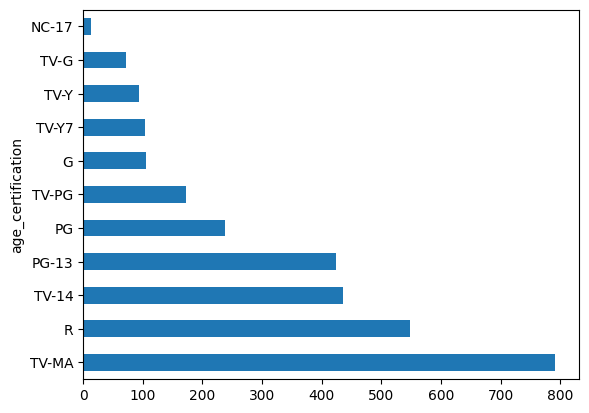

In [29]:
netflix_clean.age_certification.value_counts().plot.barh()

In [30]:
netflix_clean.isnull().sum()

index                0
title                0
type                 0
description          2
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           9
dtype: int64

<Axes: ylabel='age_certification'>

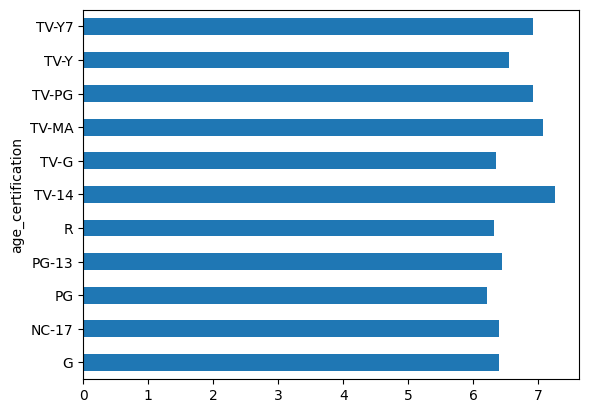

In [31]:
netflix_clean.groupby('age_certification')['imdb_score'].agg('mean').plot.barh()
plt.title('Mean of imdb scores for each age restriction')

Text(0.5, 1.0, 'Median of imdb scores for each age restriction')

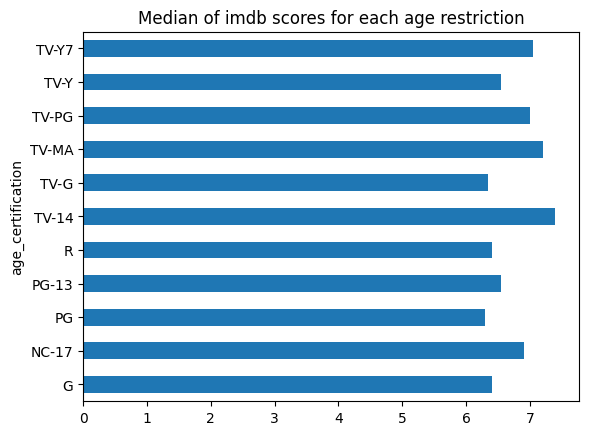

In [33]:
netflix_clean.groupby('age_certification')['imdb_score'].agg('median').plot.barh()
plt.title('Median of imdb scores for each age restriction')

Text(0.5, 1.0, 'Mean of imdb scores for each age restriction')

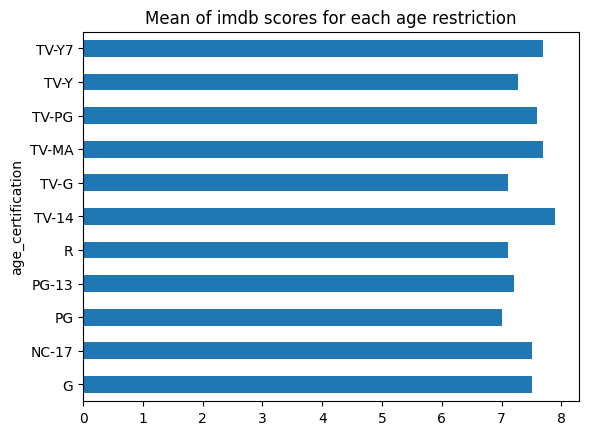

In [35]:
netflix_clean.groupby('age_certification')['imdb_score'].quantile(0.75).plot.barh()
plt.title('75th pe of imdb scores for each age restriction')

<Axes: xlabel='age_certification', ylabel='imdb_votes'>

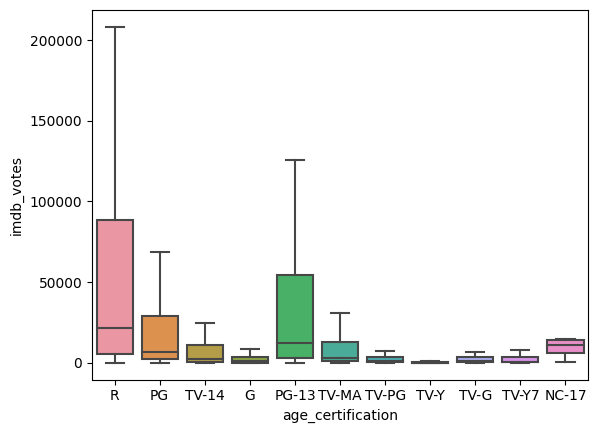

In [50]:
mean = netflix_clean.groupby('age_certification')['imdb_votes'].agg('mean').reset_index()
sns.boxplot(x=netflix_clean['age_certification'], y=netflix_clean['imdb_votes'], showfliers=False)

<Axes: xlabel='imdb_votes', ylabel='age_certification'>

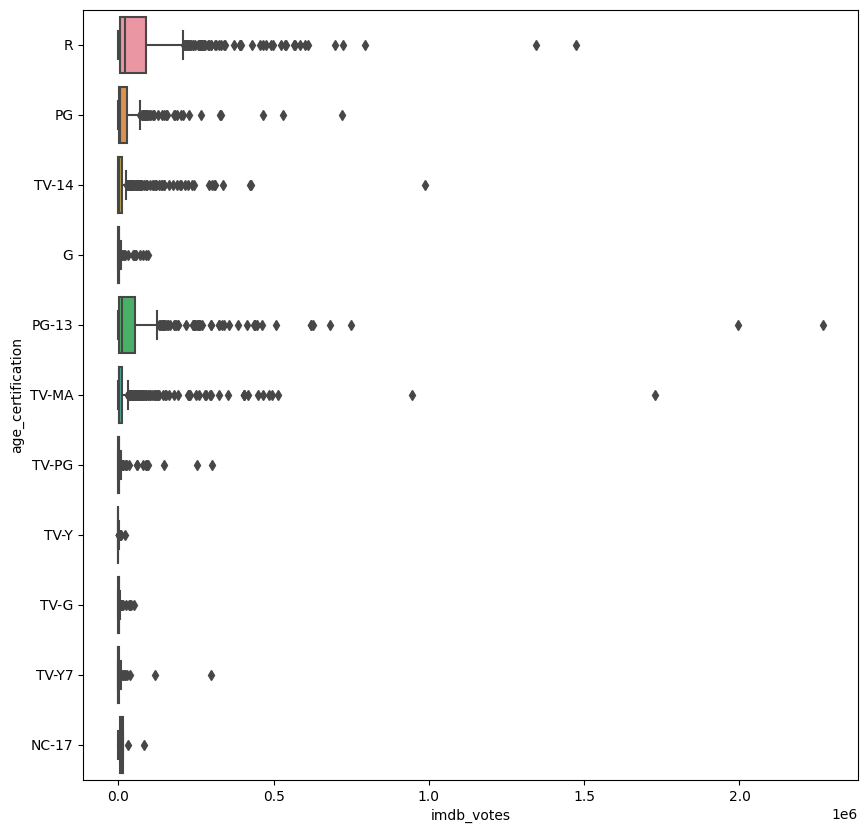

In [67]:
plt.figure(figsize=(10,10))
sns.boxplot(y=netflix_clean['age_certification'], x=netflix_clean['imdb_votes'], orient='h')

There are many outliers.

In [68]:
netflix_clean2 = netflix_clean[netflix_clean.imdb_votes<300000]

<Axes: xlabel='imdb_votes', ylabel='age_certification'>

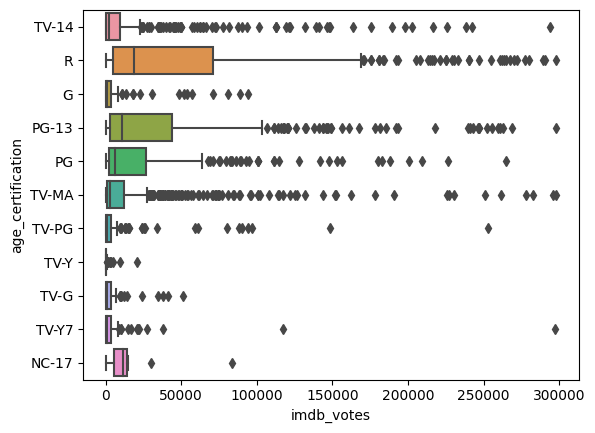

In [69]:
sns.boxplot(y=netflix_clean2['age_certification'], x=netflix_clean2['imdb_votes'], orient='h')

In [70]:
netflix.columns

Index(['index', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [71]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   title              5283 non-null   object 
 2   type               5283 non-null   object 
 3   description        5278 non-null   object 
 4   release_year       5283 non-null   int64  
 5   age_certification  2998 non-null   object 
 6   runtime            5283 non-null   int64  
 7   imdb_id            5283 non-null   object 
 8   imdb_score         5283 non-null   float64
 9   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 412.9+ KB


In [72]:
netflix.runtime.value_counts()#runtime column is measured in minutes.

runtime
90     119
24     113
100    100
95     100
45      98
      ... 
183      1
225      1
193      1
173      1
176      1
Name: count, Length: 197, dtype: int64

In [73]:
numerical = netflix_clean.select_dtypes(exclude='object')

Text(0.5, 1.0, 'Correlations')

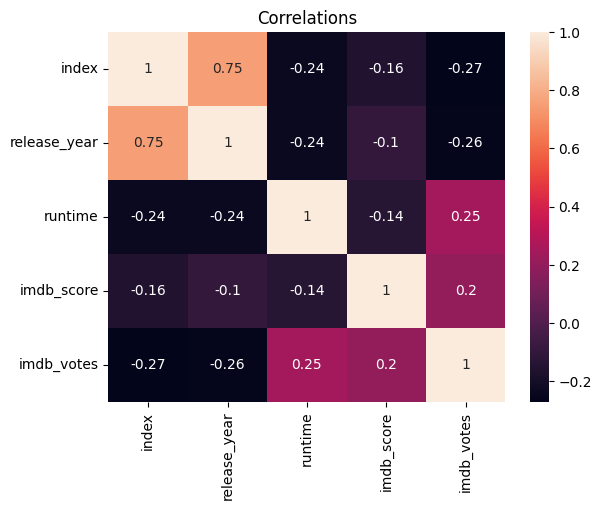

In [75]:
sns.heatmap(numerical.corr().round(2),cbar='Viridis',annot=True)
plt.title('Correlations')

In [79]:
np.cov(netflix_clean.runtime, netflix_clean.imdb_votes, rowvar=False, ddof=0)
#There are null entries that would affect the calculation

array([[1623.73454318,           nan],
       [          nan,           nan]])

In [82]:
netflix_clean.imdb_votes.isnull().sum()#9 null entries found

9

In [84]:
np.cov(netflix_clean.runtime,netflix_clean.imdb_votes.fillna(0), rowvar=False, ddof=0)
#indicates a linear relationship between the two variables

array([[1.62373454e+03, 1.11268112e+06],
       [1.11268112e+06, 1.26001169e+10]])

<Axes: >

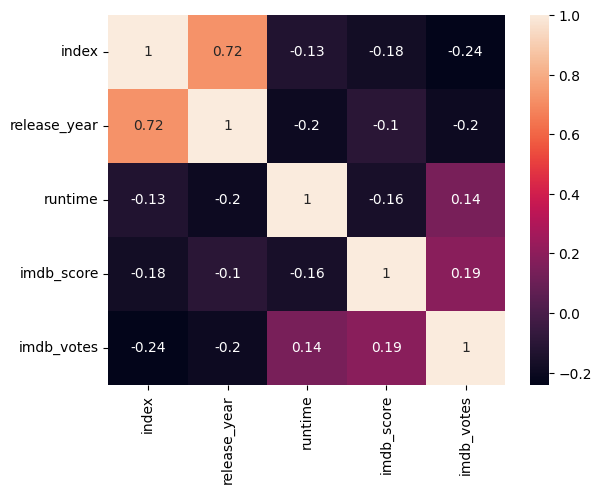

In [77]:
sns.heatmap(netflix.select_dtypes(exclude='object').corr().round(2),cbar='Viridis',annot=True)


<Axes: xlabel='imdb_votes', ylabel='runtime'>

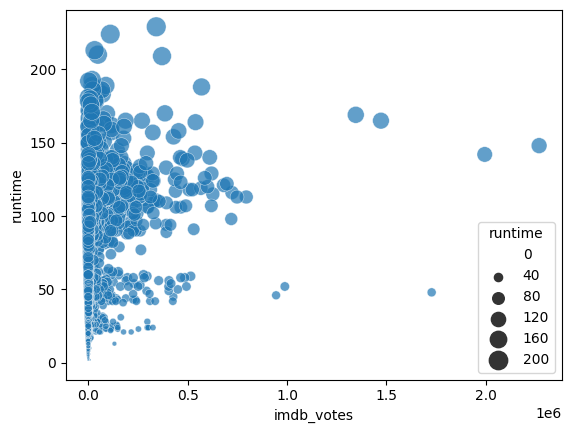

In [87]:
sns.scatterplot(x=netflix_clean.imdb_votes,alpha=.7,y=netflix_clean.runtime,sizes=(0,200),size=netflix_clean.runtime)

Text(0.5, 1.0, 'Mean Runtime')

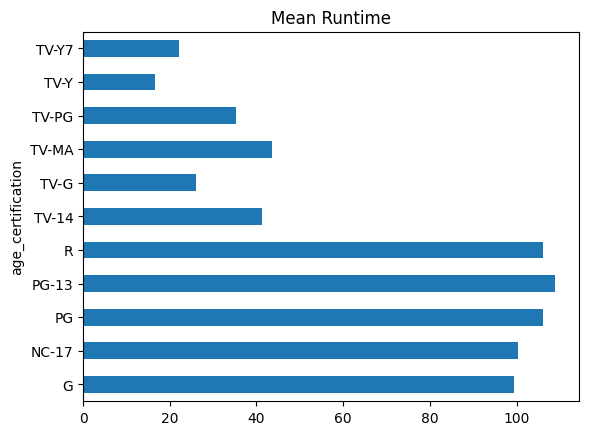

In [89]:
netflix_clean.groupby('age_certification')['runtime'].agg('mean').plot.barh()
plt.title('Mean Runtime')

<Axes: xlabel='age_certification', ylabel='runtime'>

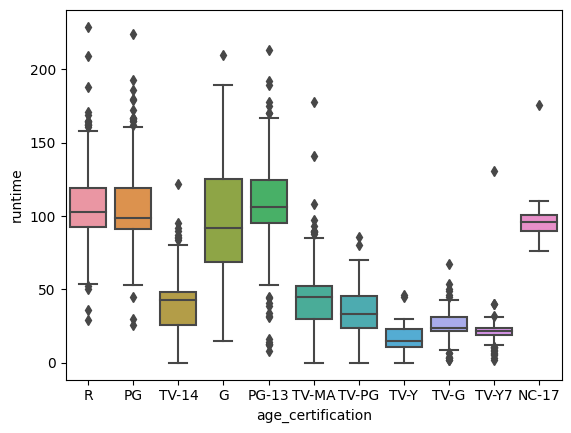

In [90]:
sns.boxplot(data=netflix_clean, x='age_certification',y='runtime')

There are several outliers in the runtime column per age restriction so the graph of the mean of runtimes is discarded. 

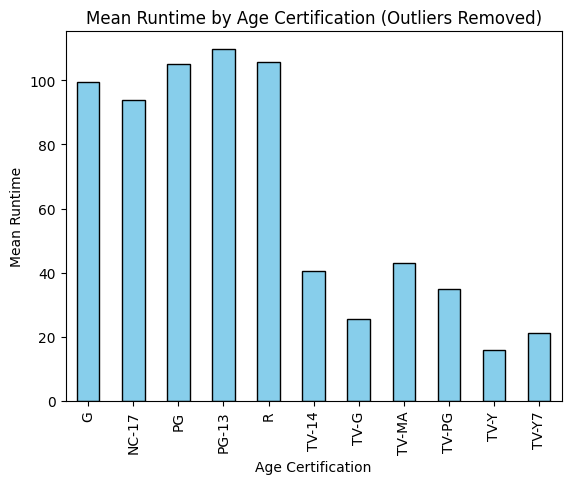

In [103]:
# Function to remove outliers using z-score
def remove_outliers(group):
    z_scores = (group['runtime'] - group['runtime'].mean()) / group['runtime'].std()
    return group[(z_scores.abs() < 3)]

# Apply the remove_outliers function to each group
netflix_cleaned = netflix_clean.groupby('age_certification').apply(remove_outliers)
netflix_cleaned.reset_index(drop=True).groupby('age_certification')['runtime'].agg('mean').plot.bar(color='skyblue',edgecolor='black')
# Plot a bar chart of the means
plt.xlabel('Age Certification')
plt.ylabel('Mean Runtime')
plt.title('Mean Runtime by Age Certification (Outliers Removed)')
plt.show()

In [96]:
netflix_clean.head()

,index,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [102]:
netflix_cleaned.reset_index(drop=True).groupby('age_certification')['runtime'].agg('mean')

age_certification
G         99.390476
NC-17     93.916667
PG       105.148305
PG-13    109.722892
R        105.841621
TV-14     40.634259
TV-G      25.478873
TV-MA     43.012706
TV-PG     35.070175
TV-Y      16.021739
TV-Y7     21.126214
Name: runtime, dtype: float64